In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , accuracy_score


In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/News4 (1).csv')
df

,Unnamed: 0,title,text,subject,date,class
0,19484,NOT KIDDING! Serial Liar Brian Williams Blames...,The man suspended from his TV anchor job for f...,left-news,"Dec 9, 2016",0
1,19485,WOW! GEORGIA Refused Election Cyber-Support Fr...,This is pretty scary stuff. A federal governme...,left-news,"Dec 9, 2016",0
2,19486,MI Election Recount Nightmare: “Write-In” Vote...,Counting Bernie Sanders write-in votes for Cli...,left-news,"Dec 9, 2016",0
3,19487,OBAMA TELLS TROOPS To Rise Up Against Trump…Pr...,43 days and counting Characterizing the milita...,left-news,"Dec 8, 2016",0
4,19488,HYSTERICAL! DELUSIONAL HILLARY CLAIMS “EPIDEMI...,Hillary Clinton on Thursday decried the spread...,left-news,"Dec 8, 2016",0
...,...,...,...,...,...,...
8510,4509,Sen. McCain says will support changing rules t...,WASHINGTON (Reuters) - U.S. Sen. John McCain o...,politicsNews,"April 3, 2017",1
8511,4510,"Trump's son-in-law, Kushner, flies into Iraq w...",BAGHDAD (Reuters) - U.S. President Donald Trum...,politicsNews,"April 3, 2017",1
8512,4511,Trump donates first-quarter salary to National...,"WASHINGTON (Reuters) - President Donald Trump,...",politicsNews,"April 3, 2017",1
8513,4512,Kansas House fails in attempt to override Medi...,(Reuters) - Lawmakers in Kansas on Monday fail...,politicsNews,"April 3, 2017",1


In [3]:
df.drop(['Unnamed: 0','title','subject','date'],axis=1,inplace=True)
df

,text,class
0,The man suspended from his TV anchor job for f...,0
1,This is pretty scary stuff. A federal governme...,0
2,Counting Bernie Sanders write-in votes for Cli...,0
3,43 days and counting Characterizing the milita...,0
4,Hillary Clinton on Thursday decried the spread...,0
...,...,...
8510,WASHINGTON (Reuters) - U.S. Sen. John McCain o...,1
8511,BAGHDAD (Reuters) - U.S. President Donald Trum...,1
8512,"WASHINGTON (Reuters) - President Donald Trump,...",1
8513,(Reuters) - Lawmakers in Kansas on Monday fail...,1


In [4]:
df.dtypes

text     object
class     int64
dtype: object

In [5]:
df.isna().sum()

text     0
class    0
dtype: int64

In [6]:
df['class'].value_counts()

1    4514
0    4001
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

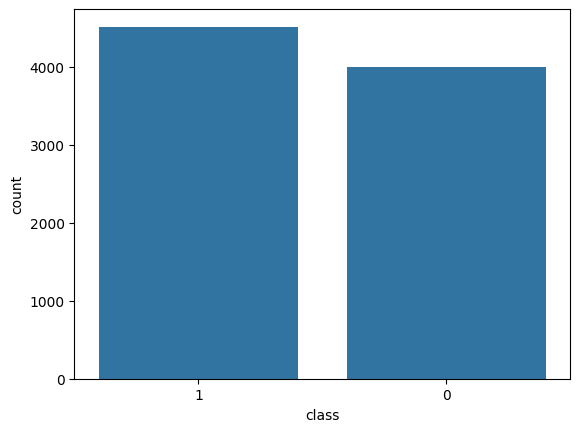

In [7]:
sns.countplot(data=df,x='class',order=df['class'].value_counts().index)

In [8]:
news=df.text
news

0       The man suspended from his TV anchor job for f...
1       This is pretty scary stuff. A federal governme...
2       Counting Bernie Sanders write-in votes for Cli...
3       43 days and counting Characterizing the milita...
4       Hillary Clinton on Thursday decried the spread...
                              ...                        
8510    WASHINGTON (Reuters) - U.S. Sen. John McCain o...
8511    BAGHDAD (Reuters) - U.S. President Donald Trum...
8512    WASHINGTON (Reuters) - President Donald Trump,...
8513    (Reuters) - Lawmakers in Kansas on Monday fail...
8514    NEW YORK (Reuters) - A coalition of U.S. state...
Name: text, Length: 8515, dtype: object

In [9]:
news=news.str.replace('[^a-zA-Z0-9]+',' ')
news

0       The man suspended from his TV anchor job for f...
1       This is pretty scary stuff A federal governmen...
2       Counting Bernie Sanders write in votes for Cli...
3       43 days and counting Characterizing the milita...
4       Hillary Clinton on Thursday decried the spread...
                              ...                        
8510    WASHINGTON Reuters U S Sen John McCain on Mond...
8511    BAGHDAD Reuters U S President Donald Trump s s...
8512    WASHINGTON Reuters President Donald Trump who ...
8513     Reuters Lawmakers in Kansas on Monday failed ...
8514    NEW YORK Reuters A coalition of U S states has...
Name: text, Length: 8515, dtype: object

In [10]:
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [ ]:
news=news.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))
news

In [ ]:
nltk.download('stopwords')
sw=stopwords.words('english')
sw

In [ ]:
news=news.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token: ' '.join(token))
news

In [ ]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(news)
print(X)

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X.shape

In [ ]:
y=df.iloc[:,-1]
y

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
y_pred_rf

In [ ]:
print(classification_report(y_test,y_pred_rf))

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
y_pred_sv

In [ ]:
print(classification_report(y_test,y_pred_sv))

In [ ]:

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

In [ ]:
print('rf:',accuracy_score(y_test,y_pred_rf))
print('sv:',accuracy_score(y_test,y_pred_sv))


In [ ]:
x=['rf','svc']
y=[accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_sv)]
plt.bar(x,y,color=['black','grey'])
plt.xlabel('algorthm')
plt.ylabel('accuracy')
plt.title('performance')
plt.show()

In [ ]:
y_new=rf.predict(vectorizer.transform(['man suspend tv anchor job fake news furious sp...']))
if y_new==1:
  print('fake news')
else:
  print('not a fake news')
